In [2]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%autoreload 2

import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import h5py
from mintpy.utils import readfile, utils as ut 
from scipy import stats
import matplotlib.dates as mdates
from mintpy.objects import timeseries


input lat / lon: 35.866 / -121.4294
corresponding y / x: 338 / 1406


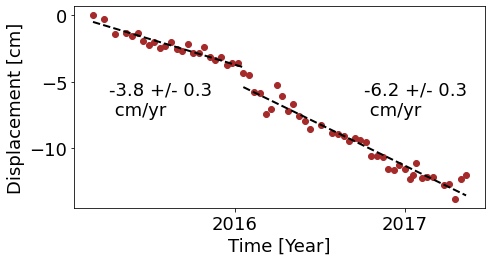

In [22]:
project_dir = './Mudcreek_data'
tsStack_minopy = project_dir + '/timeseries_SET_ERA5_demErr.h5'
gStack_minopy = project_dir + '/geometryRadar.h5'
out_dir = './out_figures'


ref_lat = 35.9022
ref_lon = -121.4523

coord = (35.866, -121.4294)

dates_minopy, ts_minopy, ts_std = ut.read_timeseries_lalo(coord[0], coord[1], tsStack_minopy, 
                                                  lookup_file=gStack_minopy, ref_lat=ref_lat, ref_lon=ref_lon,
                                                  win_size=2, unit='cm', print_msg=True)

ind = list(dates_minopy).index(datetime.datetime.strptime('20160131', '%Y%m%d'))
xx = [(x-dates_minopy[0]).days for x in dates_minopy]

res1 = stats.linregress(xx[0:ind], ts_minopy[0:ind])
res2 = stats.linregress(xx[ind::], ts_minopy[ind::])
#res.intercept + res.slope * np.array(x_mintpy)


plt.rcParams["font.size"] = "18"

fig = plt.figure(figsize=(15, 10), constrained_layout=False)
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.02, right=0.4, top=0.98, bottom=0.7,
                        hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(gs1[0,0])
ax1.plot(dates_minopy, ts_minopy, 'o', color='brown')
#ax1.errorbar(dates_minopy, ts_minopy, yerr=ts_std, fmt='-',capsize=4, color='brown', linewidth=2)

ax1.plot(dates_minopy[0:ind], res1.intercept + res1.slope * np.array(xx[0:ind]), 'k--', linewidth=2)
ax1.plot(dates_minopy[ind-1::], res2.intercept + res2.slope * np.array(xx[ind-1::]), 'k--', linewidth=2)

ax1.text(datetime.datetime.strptime('20150405', '%Y%m%d'), -7.5, '{:.1f} +/- {:.1f}\n cm/yr'.format(res1.slope*365.25, res1.stderr*365.25))
ax1.text(datetime.datetime.strptime('20161005', '%Y%m%d'), -7.5, '{:.1f} +/- {:.1f}\n cm/yr'.format(res2.slope*365.25, res2.stderr*365.25))


years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.set_xlabel('Time [Year]')

ax1.set_ylabel('Displacement [cm]')
#plt.savefig('mudcreek.eps', bbox_inches='tight', transparent=True)
plt.savefig(out_dir + '/mudcreek_ts.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()